In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [51]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
print("train edilecek data sayısı:",train_images.shape[0],"\nçerçeve boyutu:",train_images.shape[1],"x",train_images.shape[2],"\nrenk sayısı:",train_images.shape[3])

train edilecek data sayısı: 50000 
çerçeve boyutu: 32 x 32 
renk sayısı: 3


In [4]:
print("train data label sayısı:",train_labels.shape)
label=np.array(np.unique(train_labels, return_counts=True)).T
for i in label:
    print("label: ",i[0]," adeti: ",i[1])

train data label sayısı: (50000, 1)
label:  0  adeti:  5000
label:  1  adeti:  5000
label:  2  adeti:  5000
label:  3  adeti:  5000
label:  4  adeti:  5000
label:  5  adeti:  5000
label:  6  adeti:  5000
label:  7  adeti:  5000
label:  8  adeti:  5000
label:  9  adeti:  5000


In [52]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images,train_labels, train_size=0.8)

In [6]:
print("train edilecek data sayısı:",train_images.shape[0],"\nçerçeve boyutu:",train_images.shape[1],"x",train_images.shape[2],"\nrenk sayısı:",train_images.shape[3])

train edilecek data sayısı: 40000 
çerçeve boyutu: 32 x 32 
renk sayısı: 3


In [7]:
print("train edilecek data sayısı:",val_images.shape[0],"\nçerçeve boyutu:",val_images.shape[1],"x",val_images.shape[2],"\nrenk sayısı:",val_images.shape[3])

train edilecek data sayısı: 10000 
çerçeve boyutu: 32 x 32 
renk sayısı: 3


In [8]:
print("train data label sayısı:",train_labels.shape)
label=np.array(np.unique(train_labels, return_counts=True)).T
for i in label:
    print("label: ",i[0]," adeti: ",i[1])

train data label sayısı: (40000, 1)
label:  0  adeti:  4031
label:  1  adeti:  4011
label:  2  adeti:  4047
label:  3  adeti:  3988
label:  4  adeti:  3989
label:  5  adeti:  3961
label:  6  adeti:  3998
label:  7  adeti:  3968
label:  8  adeti:  4015
label:  9  adeti:  3992


In [9]:
print("train data label sayısı:",val_labels.shape)
label=np.array(np.unique(val_labels, return_counts=True)).T
for i in label:
    print("label: ",i[0]," adeti: ",i[1])

train data label sayısı: (10000, 1)
label:  0  adeti:  969
label:  1  adeti:  989
label:  2  adeti:  953
label:  3  adeti:  1012
label:  4  adeti:  1011
label:  5  adeti:  1039
label:  6  adeti:  1002
label:  7  adeti:  1032
label:  8  adeti:  985
label:  9  adeti:  1008


In [53]:
train_images = train_images / 255
val_images = val_images / 255
train_labels = to_categorical(train_labels,10)
val_labels = to_categorical(val_labels,10)
val_labels.shape

(10000, 10)

In [11]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add( tf.keras.layers.Dropout(0.25))

In [12]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [13]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
results = model.fit(train_images, train_labels,batch_size=512, epochs=10,validation_data=(val_images, val_labels))

Epoch 1/10
79/79 [==============================] - 49s 611ms/step - loss: 1.8794 - accuracy: 0.4291 - val_loss: 9.2385 - val_accuracy: 0.1609
Epoch 2/10
79/79 [==============================] - 45s 568ms/step - loss: 1.1555 - accuracy: 0.5848 - val_loss: 9.8932 - val_accuracy: 0.0992
Epoch 3/10
79/79 [==============================] - 45s 566ms/step - loss: 0.9482 - accuracy: 0.6631 - val_loss: 7.5027 - val_accuracy: 0.1501
Epoch 4/10
79/79 [==============================] - 45s 564ms/step - loss: 0.7562 - accuracy: 0.7347 - val_loss: 6.5390 - val_accuracy: 0.1768
Epoch 5/10
79/79 [==============================] - 45s 570ms/step - loss: 0.5777 - accuracy: 0.7980 - val_loss: 4.6702 - val_accuracy: 0.2805
Epoch 6/10
79/79 [==============================] - 45s 566ms/step - loss: 0.4076 - accuracy: 0.8591 - val_loss: 5.3142 - val_accuracy: 0.2384
Epoch 7/10
79/79 [==============================] - 45s 568ms/step - loss: 0.2775 - accuracy: 0.9039 - val_loss: 2.4532 - val_accuracy: 0.4890

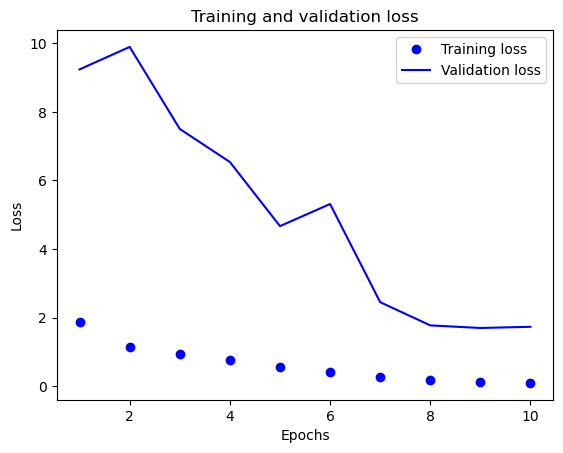

In [15]:
import matplotlib.pyplot as plt
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

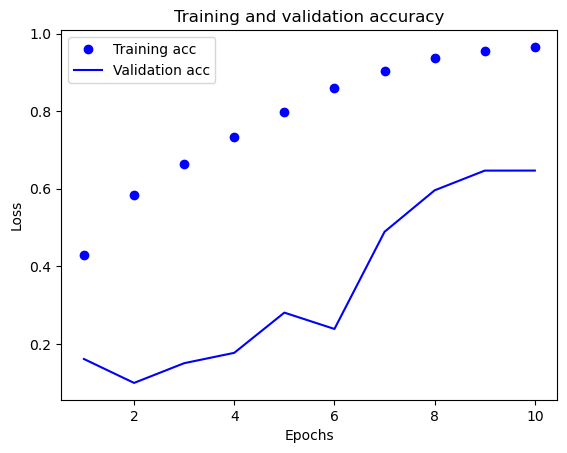

In [16]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [17]:
 pd.set_option('display.float_format', lambda x: '%.3f' % x)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu"
                                ))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu"
                                ))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 padding="same",
                                 activation="relu"
                                ))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add( tf.keras.layers.Dropout(0.40))

In [18]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add( tf.keras.layers.Dropout(0.20))


model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [19]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [20]:
results = model.fit(train_images, train_labels,batch_size=32,epochs=10,validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 301s 240ms/step - loss: 1.8310 - accuracy: 0.3217 - val_loss: 1.4769 - val_accuracy: 0.4612
Epoch 2/10
1250/1250 [==============================] - 296s 237ms/step - loss: 1.4453 - accuracy: 0.4677 - val_loss: 1.3699 - val_accuracy: 0.5128
Epoch 3/10
1250/1250 [==============================] - 301s 240ms/step - loss: 1.2144 - accuracy: 0.5670 - val_loss: 1.3317 - val_accuracy: 0.5304
Epoch 4/10
1250/1250 [==============================] - 300s 240ms/step - loss: 1.0652 - accuracy: 0.6291 - val_loss: 0.9576 - val_accuracy: 0.6669
Epoch 5/10
1250/1250 [==============================] - 306s 245ms/step - loss: 0.9465 - accuracy: 0.6739 - val_loss: 0.9897 - val_accuracy: 0.6564
Epoch 6/10
1250/1250 [==============================] - 295s 236ms/step - loss: 0.8582 - accuracy: 0.7053 - val_loss: 0.8422 - val_accuracy: 0.7095
Epoch 7/10
1250/1250 [==============================] - 303s 242ms/step - loss: 0.7864 - accuracy: 0.7281 - val_

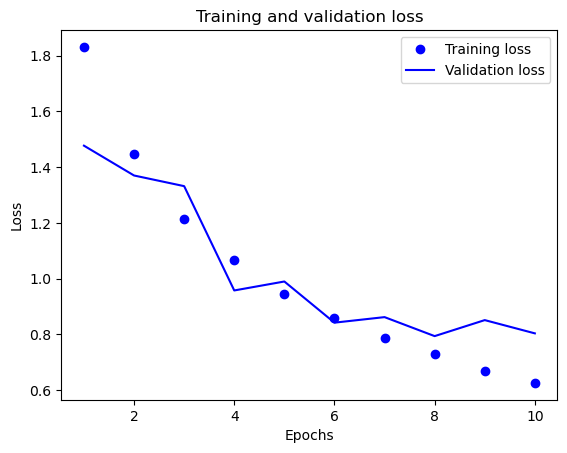

In [21]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

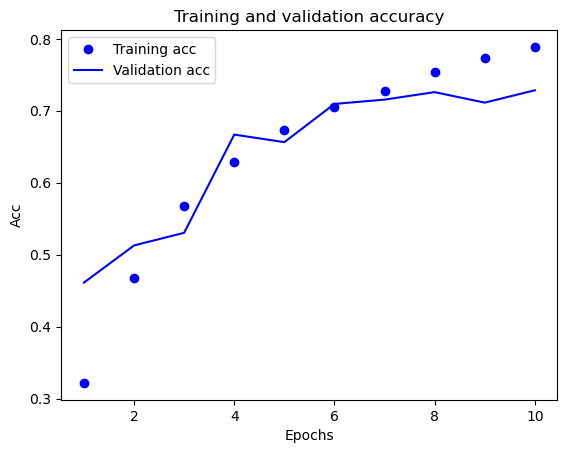

In [22]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [40]:
np.set_printoptions(suppress=True)
test_labels = to_categorical(test_labels,10)
sonuc=model.evaluate(test_images, test_labels)

313/313 [==============================] - 25s 80ms/step - loss: 185.0501 - accuracy: 0.1365


In [41]:
sonuc = model.predict(test_images)

313/313 [==============================] - 16s 51ms/step


In [54]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add( tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [55]:
results = model.fit(train_images, train_labels,batch_size=512, epochs=10,validation_data=(val_images, val_labels))

Epoch 1/10
79/79 [==============================] - 47s 579ms/step - loss: 1.8191 - accuracy: 0.4277 - val_loss: 5.8494 - val_accuracy: 0.1056
Epoch 2/10
79/79 [==============================] - 45s 575ms/step - loss: 1.1118 - accuracy: 0.6036 - val_loss: 6.1244 - val_accuracy: 0.1699
Epoch 3/10
79/79 [==============================] - 46s 581ms/step - loss: 0.8798 - accuracy: 0.6885 - val_loss: 6.3040 - val_accuracy: 0.1667
Epoch 4/10
79/79 [==============================] - 47s 595ms/step - loss: 0.6808 - accuracy: 0.7627 - val_loss: 5.6200 - val_accuracy: 0.1654
Epoch 5/10
79/79 [==============================] - 46s 583ms/step - loss: 0.4980 - accuracy: 0.8271 - val_loss: 4.2455 - val_accuracy: 0.2782
Epoch 6/10
79/79 [==============================] - 46s 581ms/step - loss: 0.3458 - accuracy: 0.8799 - val_loss: 3.0153 - val_accuracy: 0.3893
Epoch 7/10
79/79 [==============================] - 45s 575ms/step - loss: 0.2286 - accuracy: 0.9218 - val_loss: 1.9254 - val_accuracy: 0.5623

In [57]:
np.set_printoptions(suppress=True)
test_labels = to_categorical(test_labels,10)
sonuc=model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 13ms/step - loss: 724.8010 - accuracy: 0.2401


In [58]:
sonuc = model.predict(test_images)

313/313 [==============================] - 4s 13ms/step


In [63]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
a=[]
for i in range(len(sonuc)):
    for j in range(len(sonuc[i])):
        if(sonuc[i].max()== sonuc[i][j]):
            a.append(j)
            
a

[9,
 0,
 0,
 0,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 7,
 9,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 5,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 5,
 7,
 9,
 0,
 0,
 9,
 0,
 0,
 9,
 7,
 6,
 9,
 9,
 0,
 9,
 0,
 0,
 7,
 9,
 0,
 0,
 0,
 0,
 0,
 8,
 5,
 2,
 7,
 7,
 0,
 0,
 5,
 9,
 0,
 0,
 5,
 7,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 7,
 0,
 0,
 0,
 9,
 0,
 9,
 9,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 5,
 9,
 9,
 0,
 0,
 0,
 8,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 7,
 7,
 2,
 0,
 7,
 9,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 9,
 0,
 1,
 1,
 9,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 9,
 0,
 5,
 9,
 5,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 5,
 9,
 0,
 8,
 0,
 9,
 7,
 9,
 0,
 0,
 1,
 0,
 0,
 9,
 0,
 0,
 9,
 9,
 3,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 8,
 0,
 8,
 0,
 0,
 0,
 9,
 9,
 0,
 7,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 5,
 0,
 1,
 9,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 9,
 5,
 0,
 9,
 0,
 0,
 0,
 1,
 5,
 9,
 5,
 8,
 0,
 0,
 0,
 7,
 0,
 5,
 0,
 9,
 0,
 7,
 0,
 0,
 0,
 0,
 5,
 0,


In [64]:
cm=confusion_matrix(test_labels,a)


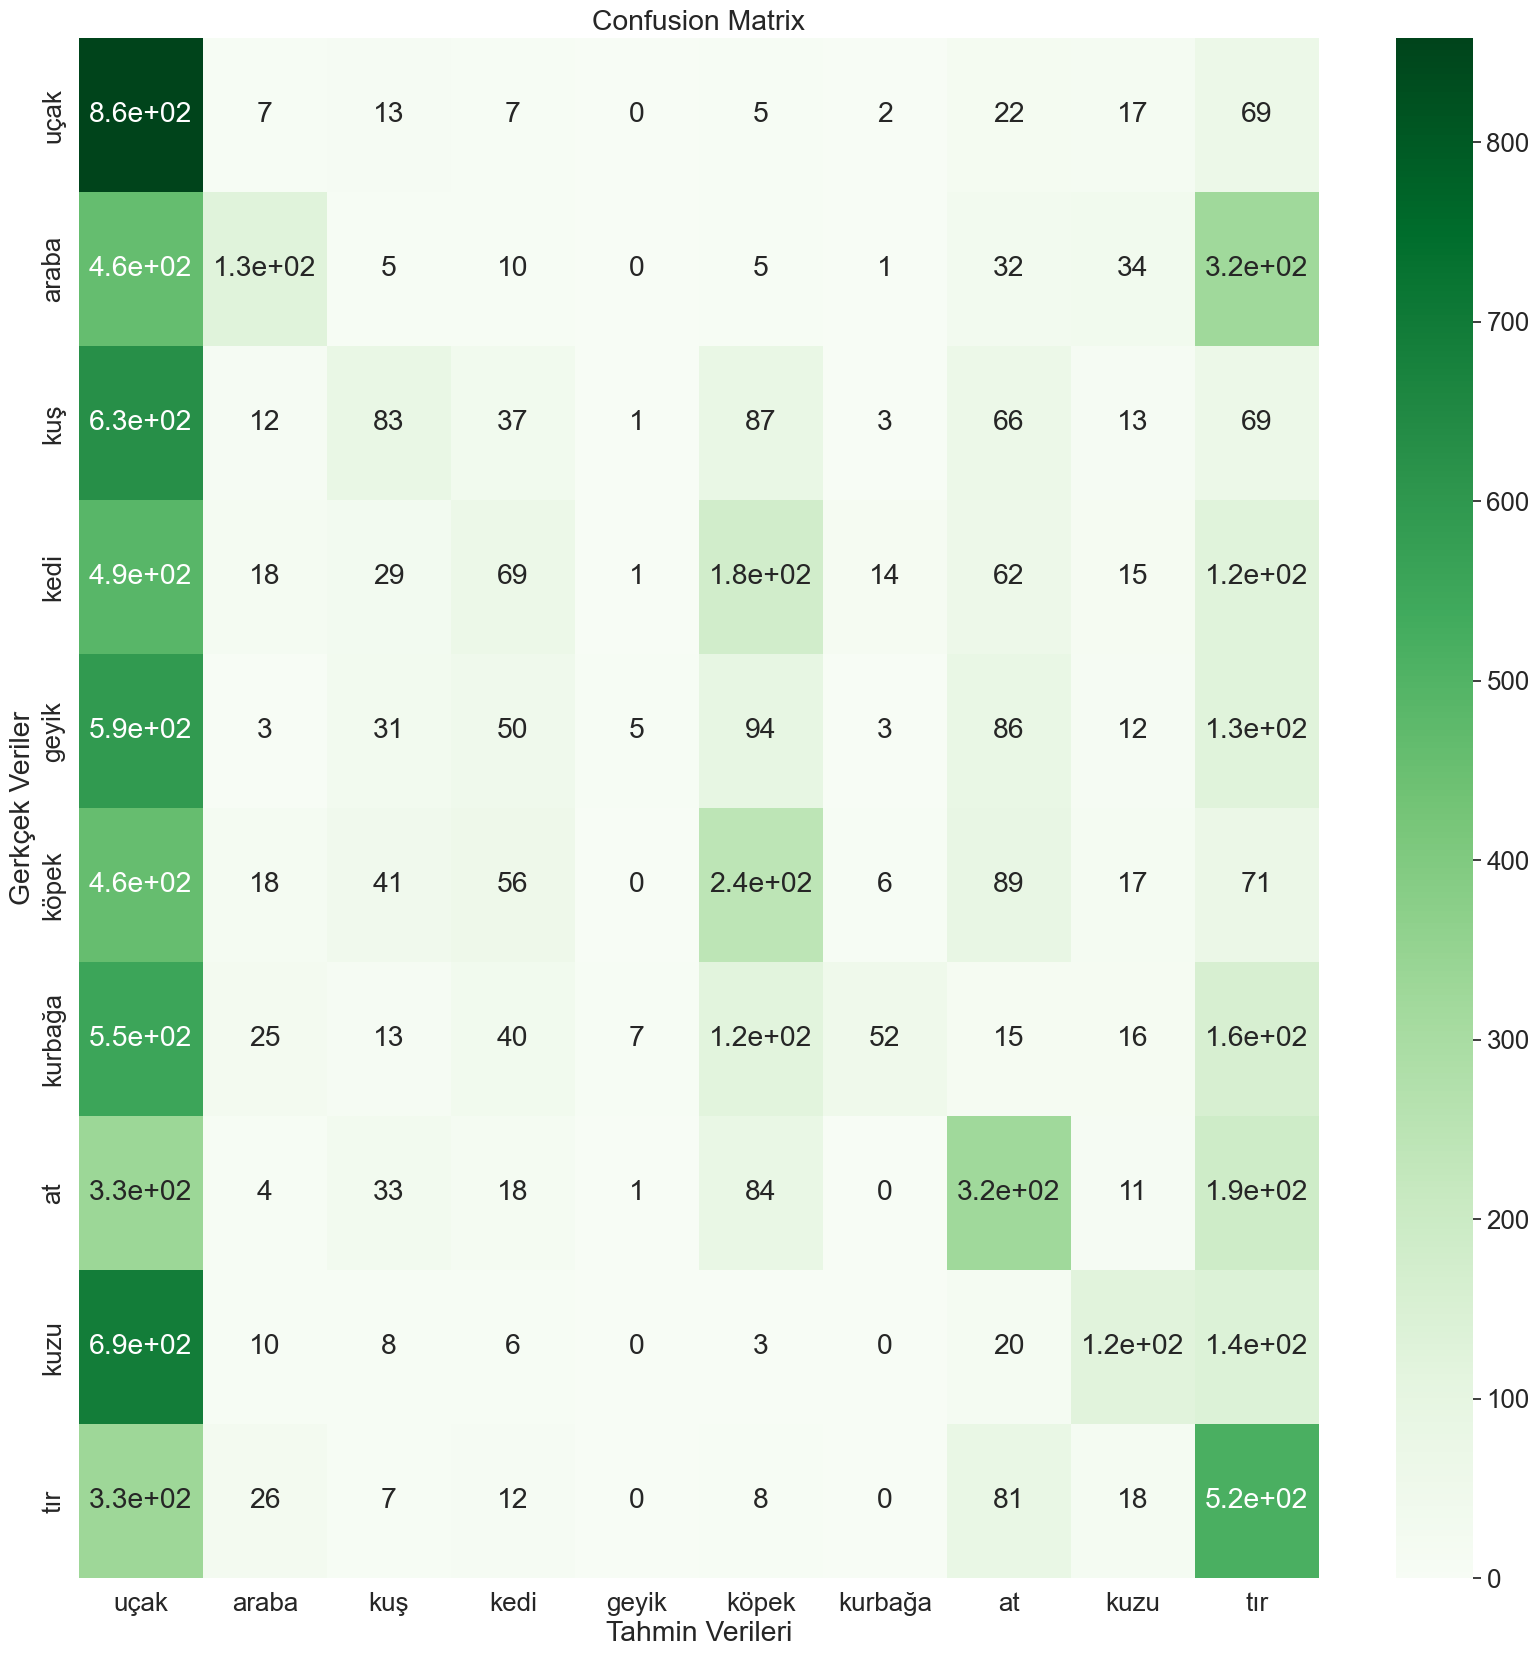

In [65]:
clas = ["uçak", "araba", "kuş", "kedi", "geyik", "köpek", "kurbağa", "at", "kuzu", "tır"]
cm_df=pd.DataFrame(cm,index=clas,
       columns=clas)
sns.set(font_scale=1.7)
plt.figure(figsize=(20,20))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Gerkçek Veriler')
plt.xlabel('Tahmin Verileri')
plt.show()

9 [3]


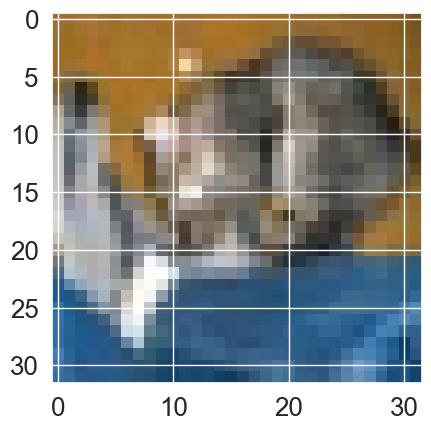

In [73]:
print(a[0],test_labels[0])
plt.imshow(test_images[0])

0 [8]


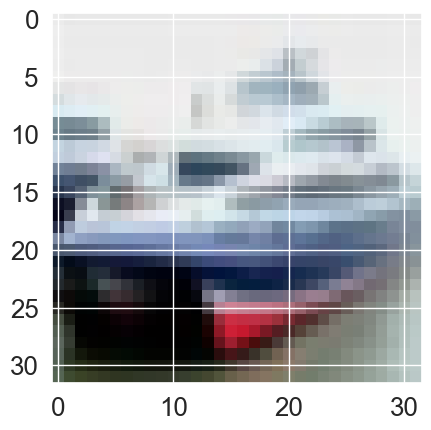

In [74]:
print(a[1],test_labels[1])
plt.imshow(test_images[1])

0 [8]


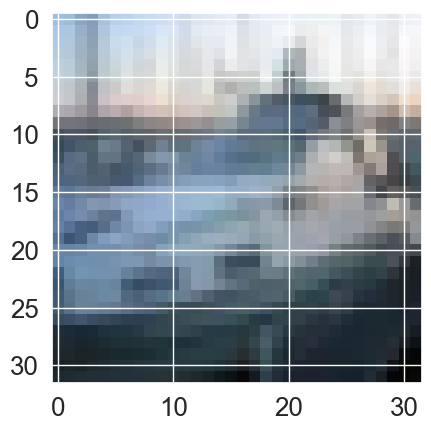

In [75]:
print(a[2],test_labels[2])
plt.imshow(test_images[2])

0 [0]


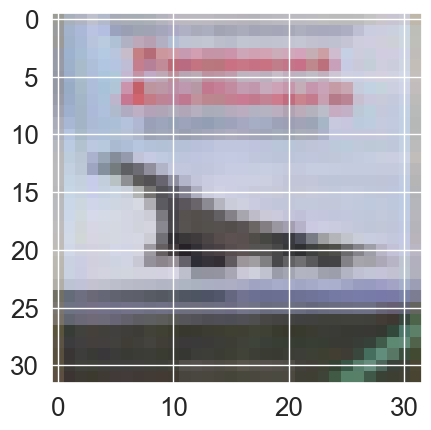

In [76]:
print(a[3],test_labels[3])
plt.imshow(test_images[3])

5 [6]


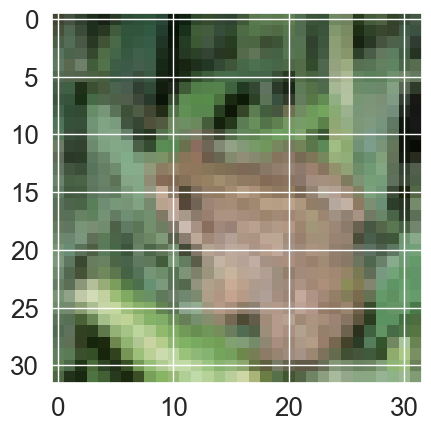

In [77]:
print(a[4],test_labels[4])
plt.imshow(test_images[4])

5 [6]


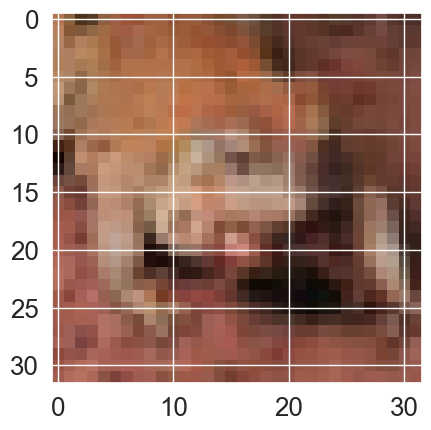

In [78]:
print(a[5],test_labels[5])
plt.imshow(test_images[5])

0 [1]


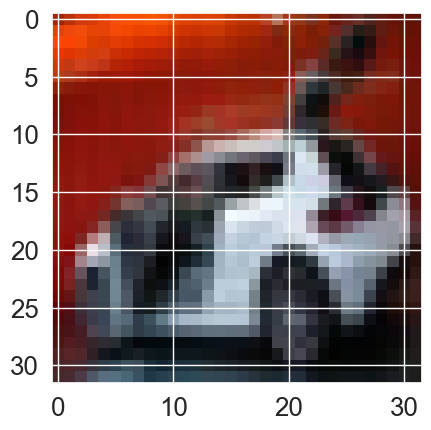

In [79]:
print(a[6],test_labels[6])
plt.imshow(test_images[6])

0 [6]


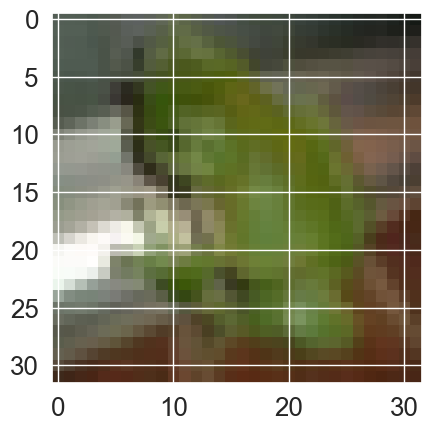

In [80]:
print(a[7],test_labels[7])
plt.imshow(test_images[7])